# Rice Disease are classified using CNN with Tensorflow

In [27]:

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
# import train.csv file
dataSet = pd.read_csv("./dataSet/train.csv")
dataSet.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [7]:
# check the shape of dataSet
dataSet.shape

(10407, 4)

In [9]:
dataSet['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [10]:
dataSet['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [11]:
dataSet['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

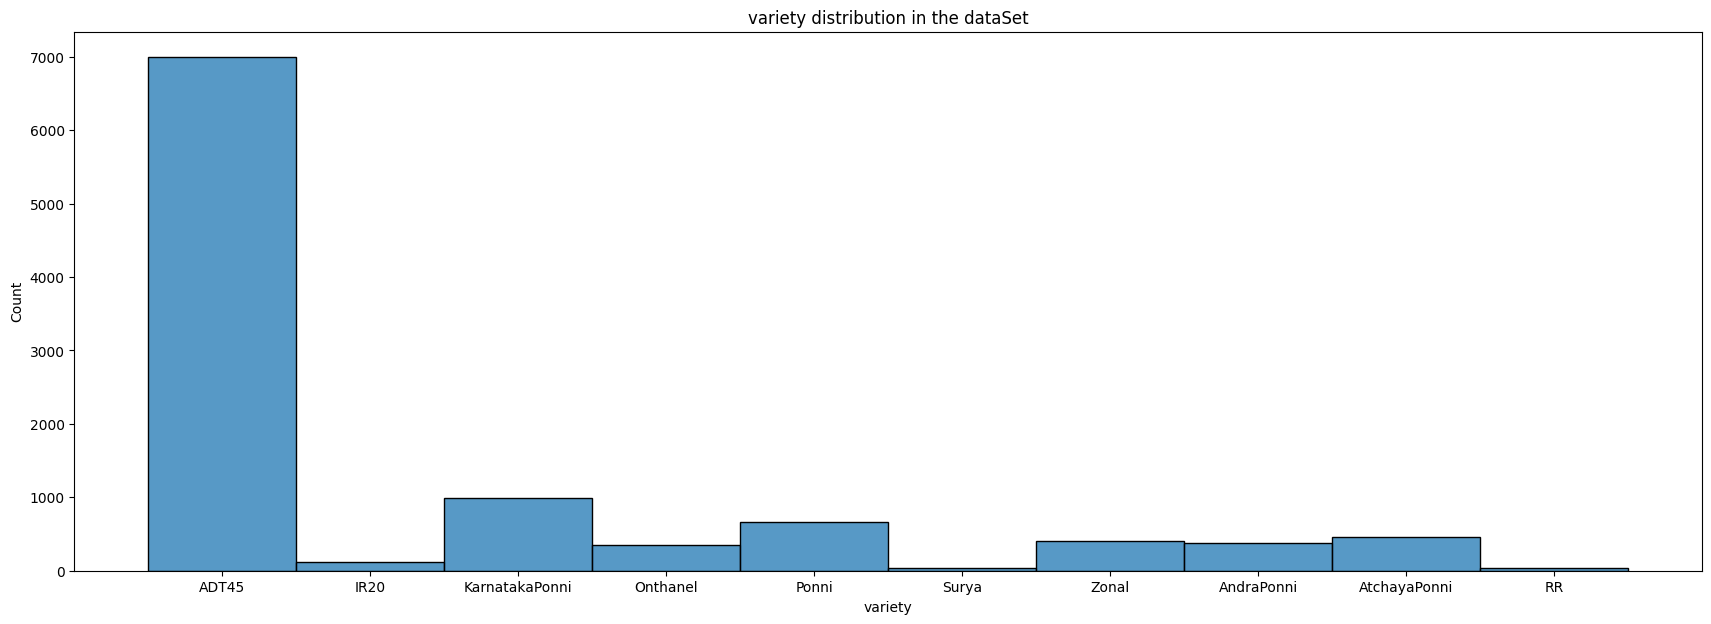

In [12]:
# plot the dataSet count based on variety name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(dataSet,x='variety',ax=axes)
plt.title('variety distribution in the dataSet')
plt.show()

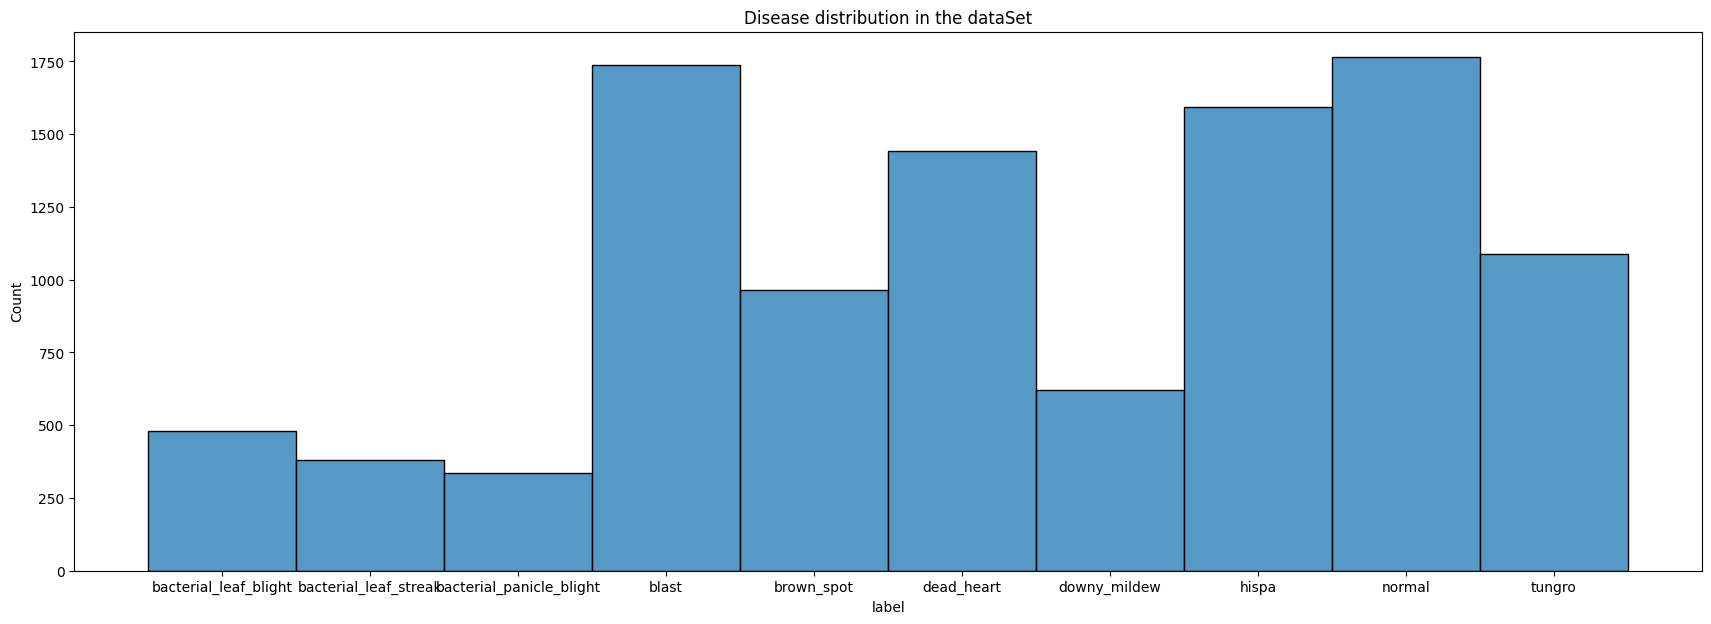

In [13]:
# plot the dataSet count based on disease name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(dataSet,x='label',ax=axes)
plt.title('Disease distribution in the dataSet')
plt.show()

In [15]:
normal = dataSet[dataSet['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [17]:
dead = dataSet[dataSet['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

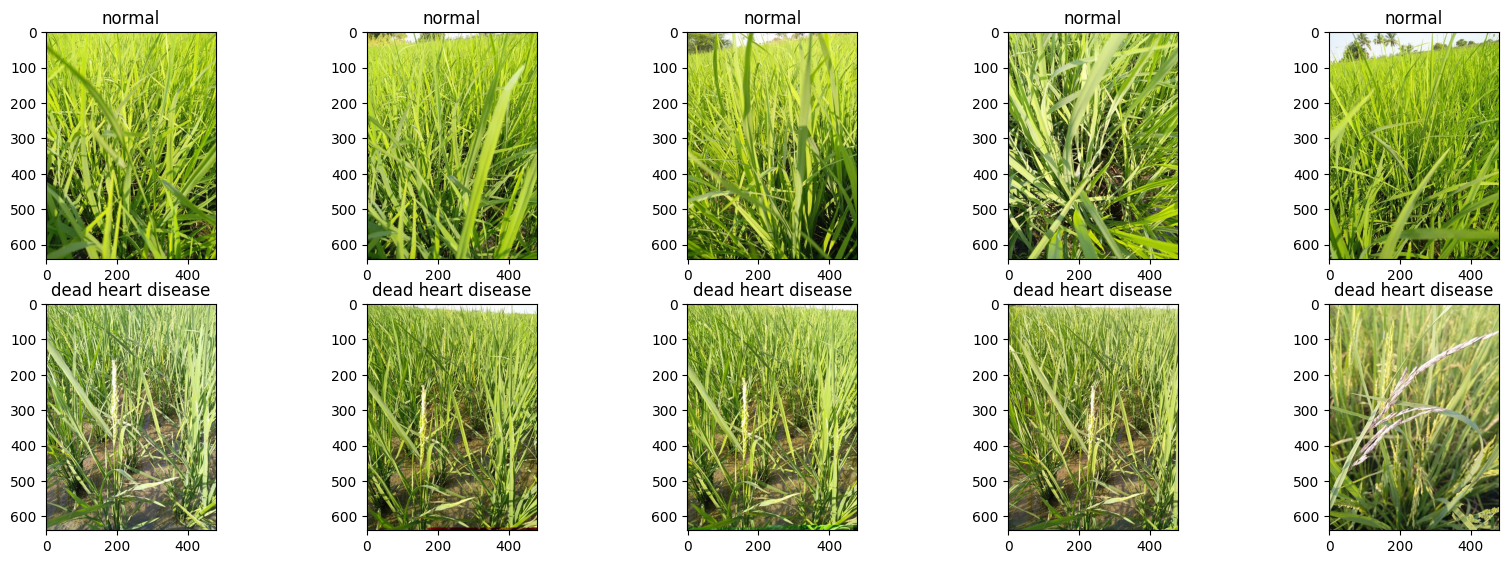

In [ ]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = './dataSet/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i+1)
    
    if i< 5:
         image=plt.imread(path+"normal/"+image_loc)
         plt.title("normal")
    else:
         plt.title("dead heart disease")
         image = plt.imread(path +"dead_heart/"+ image_loc)
        
    plt.imshow(image)
         
    

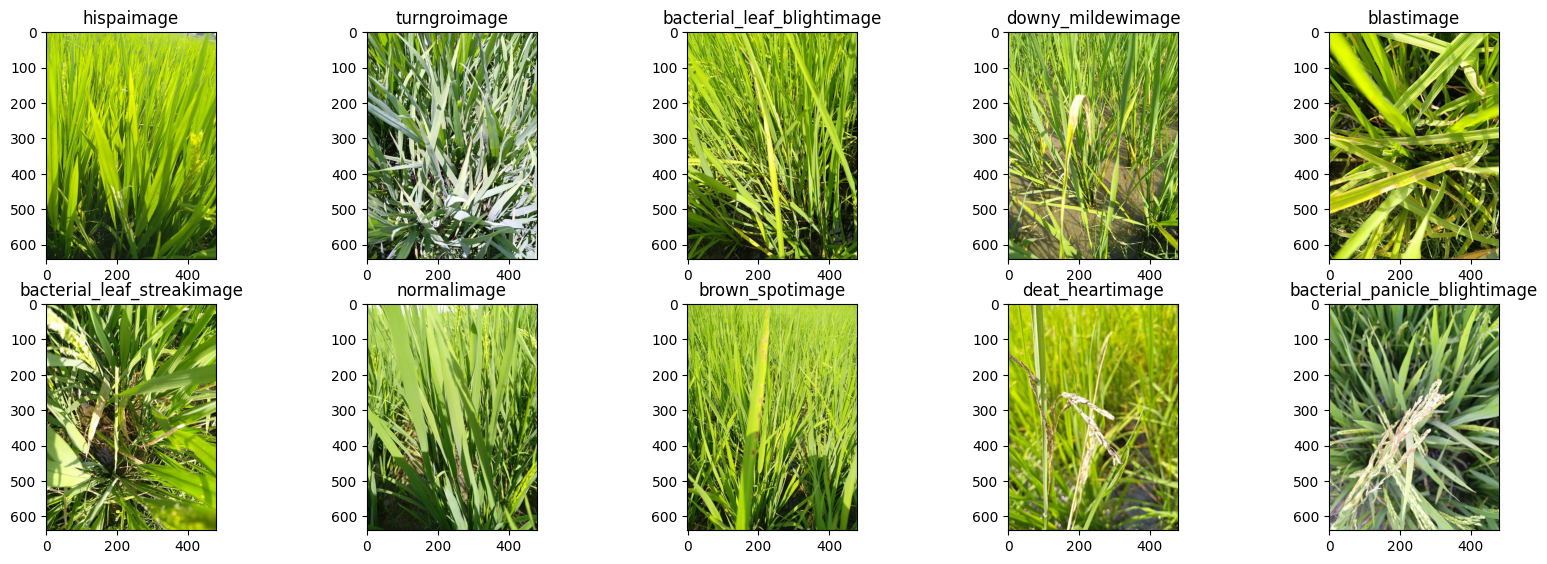

In [22]:
images = ['./dataSet/train_images/hispa/106590.jpg',\
          './dataSet/train_images/tungro/109629.jpg',\
          './dataSet/train_images/bacterial_leaf_blight/109372.jpg',\
          './dataSet/train_images/downy_mildew/102350.jpg',\
          './dataSet/train_images/blast/110243.jpg',\
          './dataSet/train_images/bacterial_leaf_streak/101104.jpg',\
          './dataSet/train_images/normal/109760.jpg',\
          './dataSet/train_images/brown_spot/104675.jpg',\
          './dataSet/train_images/dead_heart/105159.jpg',\
          './dataSet/train_images/bacterial_panicle_blight/101351.jpg']

diseases = ['hispa', 'turngro', 'bacterial_leaf_blight', 'downy_mildew', 'blast', 
            'bacterial_leaf_streak', 'normal', 'brown_spot', 'deat_heart', 'bacterial_panicle_blight']

diseases = [disease + 'image' for disease in diseases]

plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i+1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)


In [23]:
dataSet.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

dataSet['label'] = LabelEncoder().fit_transform(dataSet['label'])
dataSet['variety'] = LabelEncoder().fit_transform(dataSet['variety'])

dataSet.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [26]:
# define parameters
batch_size = 16
img_height = 224
img_width = 224

In [28]:
train_ds =  tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [29]:
val_ds =  tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [34]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [38]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 224, 224, 3)
(16,)


In [39]:
normalization_layer = tf.keras.layers.Rescaling(1./225)

In [40]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in '[0,1]'.
print(np.min(first_image), np.max(first_image))

0.0 1.1333333


In [41]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [48]:
num_classes = len(class_names)
num_classes

10

In [51]:

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.summary()

In [59]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [ ]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=2)

history = model.fit(train_ds,
          validation_data = val_ds,
          epochs = 10,
          callbacks = [early_stopping])

# Evaluate the model
loss = model.evaluate(val_ds)

# Plotting the trainning and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

# Plot the accuracy of trainning and validation

# Plotting the trainning and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

Epoch 1/10


d:\ProjectsGitHut\Rice_Disease_Classification-Peddy_Disease\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


322/521 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.9875 - loss: 0.0412

## Observations:
1. We've 10407. images in train dataSet
2. We've 10 unique disease classes
3. We've 10 unique varieties of RICE in dataSet
4. We've rice plant age ranging from 45 to 82 days
5. ADT45 is the most common variety inside the training data